The machine learning model will analyze user data to uncover trends in sexual health education preferences. 
It will personalize experiences based on age, gender, and preferences, enhancing engagement. 
Predictive analytics will anticipate user behavior, guiding proactive interventions and 
helping predict users' likelihood to use the BeeAware platform. 


Recommendation systems will suggest relevant content and features.
Through iterative learning, the model will adapt, ensuring ongoing relevance and effectiveness. 
Overall, it will optimize user experiences, drive engagement, and 
deliver valuable insights to enhance BeeAware as a user-centric sexual health education platform.

In [235]:
#Importing the necessary Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import  XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

In [236]:
STI=pd.read_csv("Medic Survey(Sexually Transmitted Infection) (Responses).csv")
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,\nLikelihood of Using SHE Platform,\nSHE Adequacy,\r\nPreferred Topics,\r\n\r\nImportance of Anonymous STI Info,\nKey Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,\r\nUnaddressed SH Topics/Questions
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None


# DATA PREPROCESSING AND CLEANING

In [237]:
#checking for the column names 
columns=STI.columns

In [238]:
#checking the shape
STI.shape

(175, 15)

In [239]:
# Remove unwanted characters from column names
STI.columns = STI.columns.str.replace('\\', '').str.replace('\n', '').str.replace('\r', '')
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Likelihood of Using SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",3,2,25 - 34,Female,Anonymous forums,None
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,3,25 - 34,male,Interactive quizzes/games,None
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,4,25 - 34,male,Moderated chat rooms,What are causes of STI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",4,5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",5,3,25 - 34,male,Interactive quizzes/games,No questions
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",1,5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None


In [240]:
# Drop one of the duplicate columns by name
STI = STI.loc[:, ~STI.columns.duplicated()]

# Print the DataFrame to verify the result
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",2,25 - 34,Female,Anonymous forums,None
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,25 - 34,male,Interactive quizzes/games,None
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,25 - 34,male,Moderated chat rooms,What are causes of STI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",3,25 - 34,male,Interactive quizzes/games,No questions
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None


In [241]:
# Extracting year, month, and day
STI['YEAR'] =  pd.to_datetime(STI['Timestamp']).dt.year
STI['MONTH'] = pd.to_datetime(STI['Timestamp']).dt.month
STI['DAY'] = pd.to_datetime(STI['Timestamp']).dt.day


In [242]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",2,25 - 34,Female,Anonymous forums,None,2024,3,18
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27


In [243]:
#checking for the null values
STI.isna().sum()

Timestamp                                    0
Time                                         0
Sources of STI Information                   0
Confidence in STI Knowledge                  0
Likelihood of Using SHE Platform             0
SHE Adequacy                                 0
Preferred Topics                             0
Importance of Anonymous STI Info             0
Key Features in SHE Platform                 0
Comfort Level Using Anonymous SH Platform    0
Age range                                    0
Gender                                       0
Connection on Platform                       0
Unaddressed SH Topics/Questions              1
YEAR                                         0
MONTH                                        0
DAY                                          0
dtype: int64

In [244]:
#Dropping the null value
# Dropping null values from the 'Unaddressed SH Topics/Questions' column
STI.dropna(subset=['Unaddressed SH Topics/Questions'], inplace=True)

In [245]:
#Rechecking if the null values have been filled up
STI.isna().sum()

Timestamp                                    0
Time                                         0
Sources of STI Information                   0
Confidence in STI Knowledge                  0
Likelihood of Using SHE Platform             0
SHE Adequacy                                 0
Preferred Topics                             0
Importance of Anonymous STI Info             0
Key Features in SHE Platform                 0
Comfort Level Using Anonymous SH Platform    0
Age range                                    0
Gender                                       0
Connection on Platform                       0
Unaddressed SH Topics/Questions              0
YEAR                                         0
MONTH                                        0
DAY                                          0
dtype: int64

In [246]:
# Extracting the lower bound of the age range
STI['lower Age'] = STI['Age range'].str.split(' - ').str[0].astype(int)
#Extracting the lower bound of the age range
STI['Upper Age'] = STI['Age range'].str.split(' - ').str[1].astype(int)

In [247]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


In [248]:
#checking for the statiscal sumart of the data
STI.describe()

,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Importance of Anonymous STI Info,Comfort Level Using Anonymous SH Platform,YEAR,MONTH,DAY,lower Age,Upper Age
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.0,174.0,174.000000,174.000000,174.000000
mean,3.402299,3.965517,3.465517,3.942529,4.017241,2024.0,3.0,19.896552,25.683908,34.402299
std,1.320884,1.201620,1.224257,1.219839,1.180154,0.0,0.0,1.543470,8.829671,9.146160
min,1.000000,1.000000,1.000000,1.000000,1.000000,2024.0,3.0,18.000000,16.000000,24.000000
25%,2.250000,3.000000,3.000000,3.000000,3.000000,2024.0,3.0,19.000000,16.000000,24.000000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,2024.0,3.0,20.000000,25.000000,34.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,2024.0,3.0,20.000000,25.000000,34.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,2024.0,3.0,27.000000,55.000000,64.000000


In [249]:
#checking for the content of the data
STI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 174
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  174 non-null    object
 1   Time                                       174 non-null    object
 2   Sources of STI Information                 174 non-null    object
 3   Confidence in STI Knowledge                174 non-null    int64 
 4   Likelihood of Using SHE Platform           174 non-null    int64 
 5   SHE Adequacy                               174 non-null    int64 
 6   Preferred Topics                           174 non-null    object
 7   Importance of Anonymous STI Info           174 non-null    int64 
 8   Key Features in SHE Platform               174 non-null    object
 9   Comfort Level Using Anonymous SH Platform  174 non-null    int64 
 10  Age range                             

In [250]:
#checking for any duplicate value in the dataset
STI.duplicated().sum()

0

In [251]:
#checking for the unique values
STI.nunique()

Timestamp                                      8
Time                                         173
Sources of STI Information                    30
Confidence in STI Knowledge                    5
Likelihood of Using SHE Platform               5
SHE Adequacy                                   5
Preferred Topics                              18
Importance of Anonymous STI Info               5
Key Features in SHE Platform                  81
Comfort Level Using Anonymous SH Platform      5
Age range                                      5
Gender                                         3
Connection on Platform                        15
Unaddressed SH Topics/Questions              150
YEAR                                           1
MONTH                                          1
DAY                                            8
lower Age                                      5
Upper Age                                      5
dtype: int64

In [252]:
#rechecking the shape
STI.shape

(174, 19)

In [253]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


# Exploratory Data/Survey Analysis Based On the Responses

1)

In [254]:
# Usind the Groupby method to get the most preferred Topics
# Splitting the 'Preferred Topics' column into separate entries
preferred_topics = STI['Preferred Topics'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_topics = preferred_topics.explode()

# Grouping by topics and counting occurrences
topic_counts = stacked_topics.groupby(stacked_topics).size().reset_index(name='count')

# Displaying the frequency of each topic
topic_counts

,Preferred Topics,count
0,Communication with partners and maintaining he...,118
1,STI prevention,100
2,STI testing,43
3,STI treatment,69
4,others(specify),14


The analysis highlights a strong interest among users in communication,
within relationships and STI prevention on the BeeAware platform. 
Topics such as STI testing and treatment also garnered notable attention. 
These findings underscore the importance of prioritizing resources on these subjects to effectively meet users' informational needs and promote sexual health awareness.

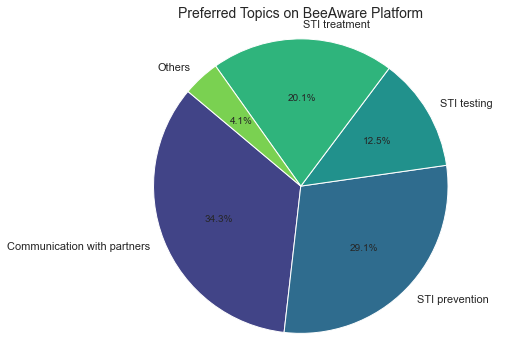

In [255]:
from matplotlib.colors import ListedColormap
# Data
topics = ["Communication with partners", "STI prevention", "STI testing", "STI treatment", "Others"]
counts = [118, 100, 43, 69, 14]

# Create a custom colormap with different shades of viridis
cmap = ListedColormap(plt.cm.viridis(np.linspace(0.2, 0.8, len(topics))))

# Create pie chart with custom colormap
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140, colors=cmap.colors)

# Adding title
plt.title('Preferred Topics on BeeAware Platform', fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


From the visaualization above, prioritizing topics based on their relevance as indicated by user preferences is crucial for designing a user-centric platform.By allocating more resources, attention, and focus on the topics that users find most important, the platform can better meet their needs and enhance user satisfaction. 
This user-driven approach ensures that the platform effectively addresses 
the concerns and interests of its audience, leading to a more engaging and valuable experience.

2)

In [256]:
# Using the Groupby method to get the most ocurrences of Key Features in SHE Platform
# Splitting the 'Preferred Topics' column into separate entries
Key_Features = STI['Key Features in SHE Platform'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_topics = Key_Features.explode()

# Grouping by topics and counting occurrences
Key_Features_counts = stacked_topics.groupby(stacked_topics).size().reset_index(name='count')

# Displaying the frequency of each topic
Key_Features_counts

,Key Features in SHE Platform,count
0,Anonymous forums/chat rooms,77
1,Directory of STI testing locations,60
2,Informative articles,100
3,Interactive quizzes/games,42
4,Q&A with healthcare professionals,112
5,Support groups,65
6,Telehealth consultations,61
7,Videos,76


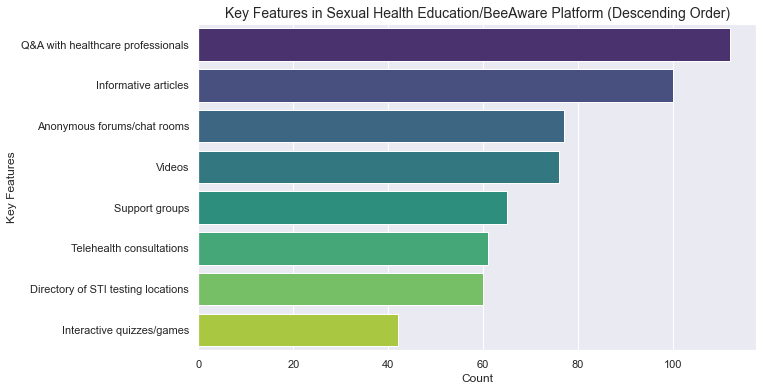

In [257]:
# Sorting the DataFrame by count in descending order
Key_Features_counts_sorted = Key_Features_counts.sort_values(by='count', ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Key Features in SHE Platform', data=Key_Features_counts_sorted, palette='viridis')

# Adding labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Key Features', fontsize=12)
plt.title('Key Features in Sexual Health Education/BeeAware Platform (Descending Order)', fontsize=14)

# Show plot
plt.show()


The result from this data/visualization indicates a strong preference for direct access to medical personnel 

through features like "Q&A with healthcare professionals" and "Telehealth consultations."
Therefore, it's essential to prioritize and prominently feature these options on the BeeAware platform.

This ensures users can easily access expert advice and support for their sexual health concerns, 
enhancing the platform's effectiveness and user satisfaction.

In [258]:
# Using the Groupby method to get the most ocurrences of Sources of STI Information
# Splitting the 'Preferred Topics' column into separate entries
INFO_Features = STI['Sources of STI Information'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_INFO = INFO_Features.explode()

# Grouping by topics and counting occurrences
INFO_Features_counts = stacked_INFO.groupby(stacked_INFO).size().reset_index(name='count')

# Displaying the frequency of each topic
INFO_Features_counts

,Sources of STI Information,count
0,friends,54
1,medical practitioners,83
2,others(specify),18
3,school(sex education class),50
4,social media,81
5,websites,88


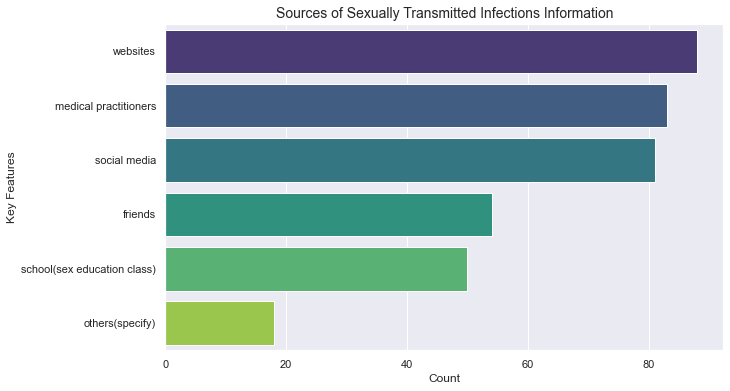

In [259]:
# Sorting the DataFrame by count in descending order
INFO_Features_counts_sorted = INFO_Features_counts.sort_values(by='count', ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Sources of STI Information', data=INFO_Features_counts_sorted, palette='viridis')

# Adding labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Key Features', fontsize=12)
plt.title('Sources of Sexually Transmitted Infections Information', fontsize=14)

# Show plot
plt.show()

a)websites:Based on this visualization, we can proceed with the website as the primary information source, given that most users rely on it for obtaining information.


b)medical practioners:The users get the second top most information from the medical pratictioners indicating that, 
in building the beeaware plaform healthcare and medical practitioners section must be included and prioritized as this will make beaware platform very useful and it will aid accessibility for it's users 


c)social media:Beeaware should also create a presence on Social media, such as IG, Twitter, FB 
in order to allow much easier assess of information expecially for those who choose to remain anonymous

In [260]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


4)

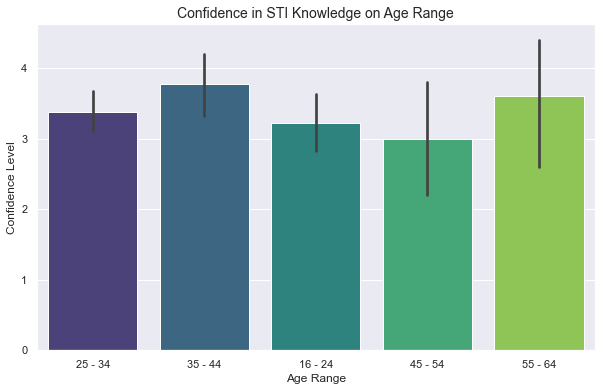

In [261]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Age range", y="Confidence in STI Knowledge",data = STI ,palette='viridis')

# Adding labels and title
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Confidence Level', fontsize=12)
plt.title('Confidence in STI Knowledge on Age Range', fontsize=14)

# Show plot
plt.show()


Considering the lower confidence level in STI knowledge among the 45-55 age range; 
BeeAware should prioritize developing a more user-friendly website. 
This initiative aims to empower individuals of all age groups to access information and express themselves confidently
regarding sexual health topics.

5)

In [262]:
# Using the Groupby method to get the most ocurrences of Connection on Platform
# Splitting the 'Preferred Topics' column into separate entries
Connection_Features = STI['Connection on Platform'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
stacked_connection = Connection_Features.explode()

# Grouping by topics and counting occurrences
connection_Features_counts =stacked_connection .groupby(stacked_connection).size().reset_index(name='count')

# Displaying the frequency of each topic
connection_Features_counts

,Connection on Platform,count
0,Anonymous forums,94
1,Interactive quizzes/games,54
2,Moderated chat rooms,85
3,Private messaging),65


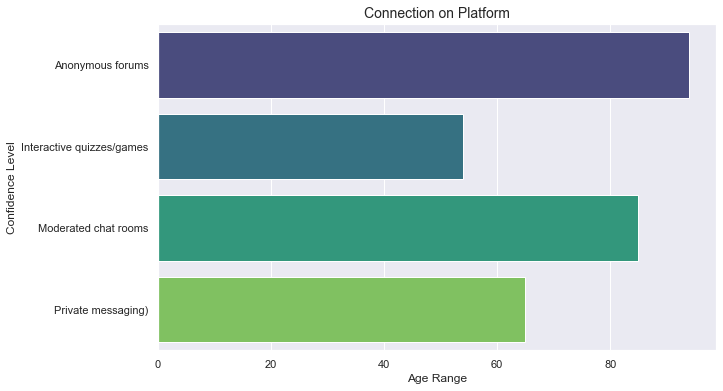

In [263]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="Connection on Platform",data =connection_Features_counts ,palette='viridis')

# Adding labels and title
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Confidence Level', fontsize=12)
plt.title('Connection on Platform', fontsize=14)

# Show plot
plt.show()

while building the Beeaware website;
incorporation of anonymous chat rooms and moderated chat rooms should be paramount in order for all users to connect freely.

5)

In [264]:
# Using the Groupby method to get the most ocurrences of 
# Splitting the 'Preferred Topics' column into separate entries
Unaddressed_Features = STI['Unaddressed SH Topics/Questions'].str.split(', ')

# Using stack to create a DataFrame with a single column of topics
Unaddressed_stacked = Unaddressed_Features.explode()

# Grouping by topics and counting occurrences Unaddressed SH Topics/Questions
Unaddressed_Features_counts = Unaddressed_stacked.groupby(Unaddressed_stacked).size().reset_index(name='count')

# Displaying the frequency of each topic
Unaddressed_Features_counts

,Unaddressed SH Topics/Questions,count
0,,1
1,.,1
2,1. The Place and importance of Sexual relation...,1
3,2,1
4,A,1
...,...,...
153,safety and freedom from discretion violence,1
154,safety and freedom from discrimination and vio...,2
155,sexual orientation and sexual harassment borde...,1
156,signs and symptoms,1


In [265]:
#Top 20 Unaddressed SH Topics/Questions by count
most_unadressed_questions=Unaddressed_Features_counts.nlargest(10,"count")
most_unadressed_questions

,Unaddressed SH Topics/Questions,count
66,None,15
64,Non,4
67,None,4
85,STI,3
89,STI testing,2
101,Sexual health is about well-being,2
136,Treatment,2
149,not merely the absence of disease. Sexual heal...,2
154,safety and freedom from discrimination and vio...,2
0,,1


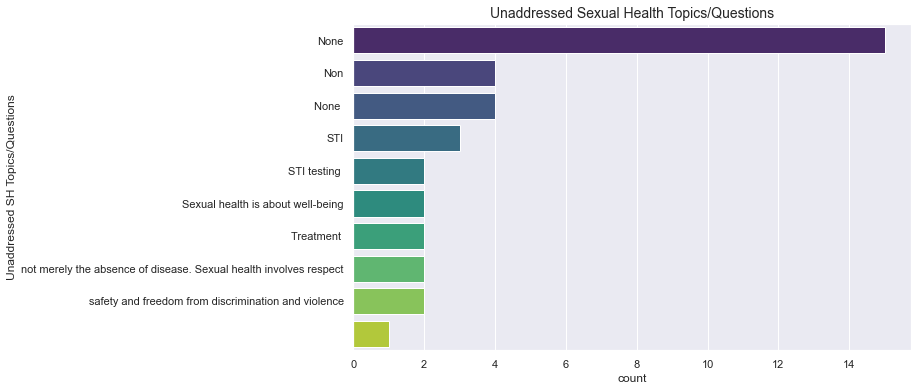

In [266]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="Unaddressed SH Topics/Questions",data =most_unadressed_questions ,palette='viridis')

# Adding labels and title
plt.xlabel('count', fontsize=12)
plt.ylabel('Unaddressed SH Topics/Questions', fontsize=12)
plt.title('Unaddressed Sexual Health Topics/Questions', fontsize=14)

# Show plot
plt.show()

From the result above it was deduced that;
The survey covered various sexual health topics well, but users emphasized the importance of STI, STI testing and prevention.
This suggests the BeAware platform should include dedicated sections,
providing information and resources for the in depth meaning of STI, regular screening and prevention strategies ,
to enhance sexual health education.

6)

In [267]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,"medical practitioners, websites",3,3,4,"STI prevention, STI testing, STI treatment, Co...",4,"Videos, Q&A with healthcare professionals",2,25 - 34,Female,Anonymous forums,None,2024,3,18,25,34
1,3/18/2024,10:05:30,friends,3,3,3,STI prevention,3,Anonymous forums/chat rooms,3,25 - 34,male,Interactive quizzes/games,None,2024,3,18,25,34
2,3/18/2024,12:14:04,"medical practitioners, social media",1,5,5,STI prevention,5,Informative articles,5,35 - 44,Female,Moderated chat rooms,Prevention of sexually transmitted diseases,2024,3,18,35,44
3,3/18/2024,12:14:50,social media,5,5,5,"STI prevention, Communication with partners an...",4,"Informative articles, Videos, Q&A with healthc...",5,35 - 44,male,"Interactive quizzes/games, Moderated chat room...",Sexualy transmitted diseases among married cou...,2024,3,18,35,44
4,3/18/2024,14:02:00,"medical practitioners, websites, social media",4,5,4,"STI prevention, STI treatment, Communication w...",5,"Informative articles, Anonymous forums/chat ro...",4,25 - 34,male,Moderated chat rooms,What are causes of STI,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,"medical practitioners, websites",4,5,4,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Videos, Q&A with healthc...",5,25 - 34,Female,"Anonymous forums, Moderated chat rooms",I think everything was addressed,2024,3,25,25,34
171,3/25/2024,22:16:12,"websites, friends, social media",4,4,4,Communication with partners and maintaining he...,4,"Informative articles, Q&A with healthcare prof...",4,25 - 34,Female,"Anonymous forums, Private messaging)",None for now.,2024,3,25,25,34
172,3/26/2024,14:55:10,"medical practitioners, websites, friends, soci...",5,5,5,"STI prevention, STI testing, STI treatment, Co...",5,"Informative articles, Support groups, Teleheal...",3,25 - 34,male,Interactive quizzes/games,No questions,2024,3,26,25,34
173,3/27/2024,12:14:54,"websites, social media, school(sex education c...",3,3,1,Communication with partners and maintaining he...,1,"Informative articles, Anonymous forums/chat ro...",5,25 - 34,Female,"Interactive quizzes/games, Anonymous forums, M...",None,2024,3,27,25,34


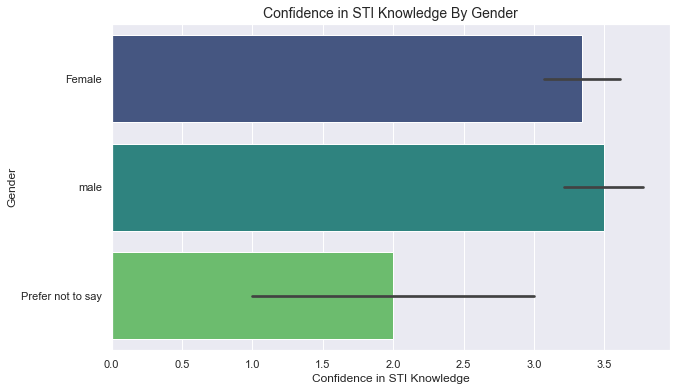

In [268]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Confidence in STI Knowledge", y="Gender",data = STI ,palette='viridis')

# Adding labels and title
plt.xlabel('Confidence in STI Knowledge', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Confidence in STI Knowledge By Gender', fontsize=14)

# Show plot
plt.show()

To deduce why males might have more confidence in STI knowledge than females;
we can analyze the dataset for potential reasons:

a)Sources of STI Information: 
Check if males tend to rely more on sources known for providing detailed or accurate STI information compared to females. 
For example, if males predominantly consult medical practitioners or reputable websites, 
they may feel more confident in their knowledge.

b)Preferred Topics and Importance: 
Examine if males prioritize STI-related topics more and perceive them as more important.
If males frequently select STI prevention, testing, and treatment as preferred topics and rate their importance higher, 
they may have greater confidence in their knowledge in these areas.

c)Comfort Level with Anonymous Platforms: 
    
Evaluate if males feel more comfortable using anonymous platforms for discussing sexual health topics. 
If males express higher comfort levels with anonymous forums or chat rooms, 
they may engage more actively in discussions and acquire more knowledge, leading to increased confidence.

d)Connection on Platform: Investigate if males report having a stronger connection with the platform or 
find it more conducive to learning about STIs. 
If males indicate a higher likelihood of using the platform and report feeling more connected, 
they may engage more with STI-related content and develop greater confidence in their knowledge.

By analyzing these aspects within the dataset, we can gain insights into why males exhibit higher confidence in STI knowledge and
tailor strategies to address potential disparities and promote knowledge equity among different gender groups.


.







But on the other note we may conclude that:
To ensure equal knowledge dissemination;
The BeAware platform can offer gender-inclusive content, targeted outreach, and gender-sensitive education.
Interactive tools, community support, and feedback mechanisms can further engage users of all genders, 
promoting informed decision-making about sexual health and STIs

7)

#Trying to confirm and analyze why male has more cofidence in sti knowledge than the female from the analysis above 
To deduce why males might have more confidence in STI knowledge than females;
we can analyze the dataset for potential reasons:

a)Sources of STI Information: 
Check if males tend to rely more on sources known for providing detailed or accurate STI information compared to females. 
For example, if males predominantly consult medical practitioners or reputable websites, 
they may feel more confident in their knowledge.


In [269]:
# Grouping by 'Gender' and 'Sources of STI Information', and counting occurrences
INFO_Features_counts = STI.groupby(['Gender', 'Sources of STI Information']).size().reset_index(name='count')

# Displaying the frequency of each topic by gender
INFO_Features_counts

INFORMATION=INFO_Features_counts.nlargest(10,"count")
INFORMATION


,Gender,Sources of STI Information,count
15,Female,school(sex education class),13
28,male,medical practitioners,13
44,male,social media,12
46,male,websites,11
2,Female,medical practitioners,9
17,Female,websites,9
16,Female,social media,8
5,Female,"medical practitioners, websites",7
10,Female,"medical practitioners, websites, friends, soci...",6
8,Female,"medical practitioners, websites, friends, soci...",5


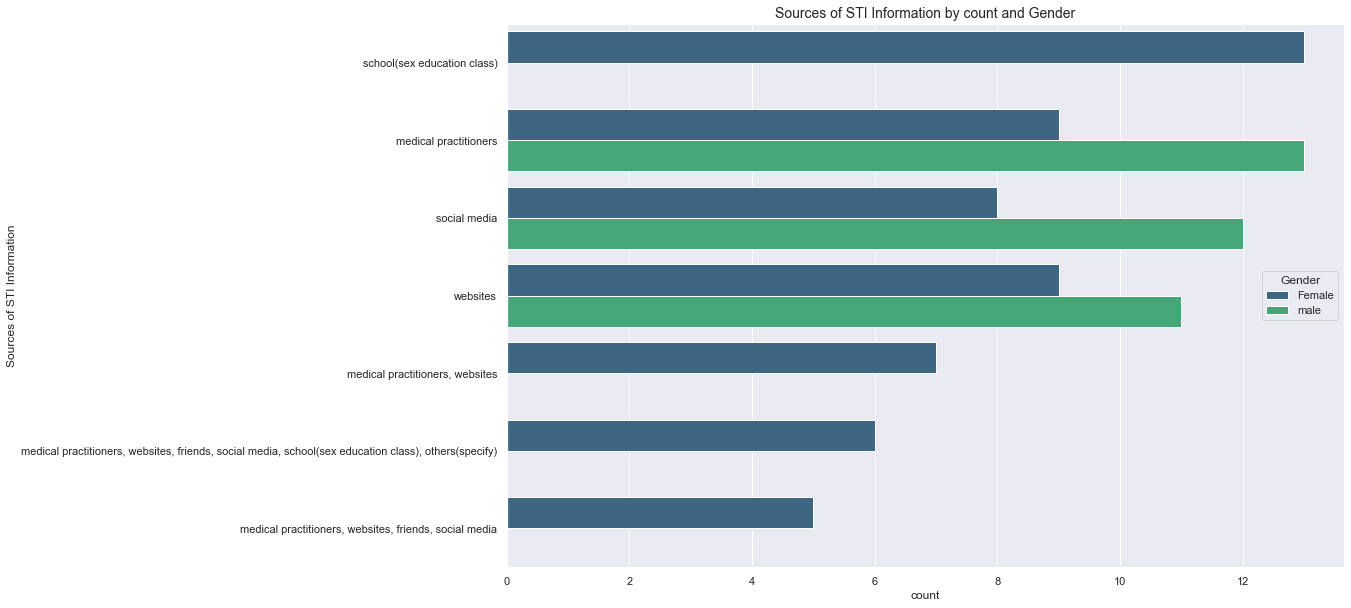

In [270]:
# Create bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x="count", y="Sources of STI Information",data =INFORMATION ,hue="Gender", palette='viridis')

# Adding labels and title
plt.xlabel('count', fontsize=12)
plt.ylabel('Sources of STI Information', fontsize=12)
plt.title('Sources of STI Information by count and Gender', fontsize=14)

# Show plot
plt.show()

Analyzed conclusion:Upon conducting the analysis, we observe that males tend to consult medical practitioners and reputable websites more frequently compared to females. This suggests that males may indeed rely more on these sources for obtaining detailed or accurate STI information. Conversely, females may be consulting a broader range of sources or relying less on these specific sources.

From the visualization above, it is evident that males have a higher confidence in their STI knowledge, primarily because they obtain most of their information from reliable sources such as medical practitioners, social media, and websites. This suggests that the prevalence of consultations with reputable sources may contribute to a greater confidence level in STI knowledge among males.

In summary, based on the analysis and visualization, it can be concluded that there is a notable difference in the reliance on sources of STI information between genders, with males showing a tendency to consult more reliable sources, thereby potentially leading to higher confidence in their STI knowledge compared to females.


8)

In [271]:
# Grouping by 'Gender' and 'Preferred Topics', and counting occurrences
Preferred_Topics_counts = STI.groupby(['Gender', 'Preferred Topics']).size().reset_index(name='count')

# Displaying the frequency of each topic by gender
Preferred_Topics_counts

INFORMATION=Preferred_Topics_counts.nlargest(10,"count")
INFORMATION


,Gender,Preferred Topics,count
0,Female,Communication with partners and maintaining he...,27
15,male,Communication with partners and maintaining he...,24
5,Female,"STI prevention, STI testing, STI treatment, Co...",15
1,Female,STI prevention,13
17,male,STI prevention,11
18,male,"STI prevention, Communication with partners an...",11
20,male,"STI prevention, STI testing, STI treatment, Co...",9
2,Female,"STI prevention, Communication with partners an...",8
11,Female,STI treatment,7
23,male,"STI prevention, STI treatment",5



The data suggests that both females and males prioritize communication with partners and maintaining healthy relationships as a preferred topic, with females slightly leading in this aspect. Additionally, STI prevention emerges as a significant concern for both genders, with females demonstrating a higher count in overall STI prevention topics. Males, on the other hand, seem to focus more on specific combinations of topics related to prevention and communication. This highlights the importance of addressing comprehensive sexual health education and promoting open communication within relationships to effectively combat STIs.


Product designers should prioritize comprehensive sexual health education content and interactive features for open communication. UI/UX designers must design intuitive interfaces for easy access to topics and communication tools. Backend developers ensure robust data management, while frontend developers implement responsive interfaces and interactive elements for enhanced user engagement.

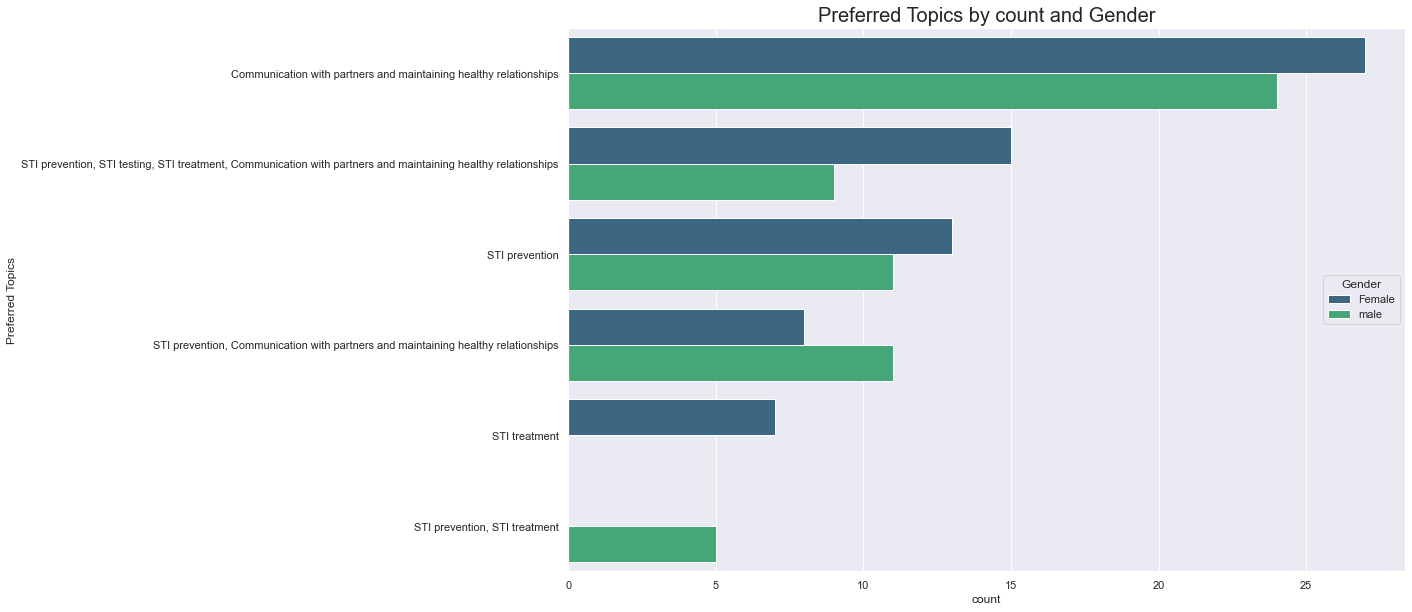

In [272]:
# Create bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x="count", y="Preferred Topics",data =INFORMATION ,hue="Gender", palette='viridis')

# Adding labels and title
plt.xlabel('count', fontsize=12)
plt.ylabel('Preferred Topics', fontsize=12)
plt.title('Preferred Topics by count and Gender', fontsize=20)

# Show plot
plt.show()

On the Beeaware platform the 
UI/UX Designers can create intuitive interfaces with features like chat and quizzes for partner communication and STI prevention. Product Designers lead the strategic vision, aligning features with user priorities. Frontend Developers implement responsive interfaces and interactive elements, while Backend Developers manage server-side logic for seamless integration and platform optimization.

To enhance effectiveness on the BeeAware platform, prioritize topics such as communication with partners and STI prevention through tailored content and interactive features. Collaborate with experts, gather user feedback, and promote accessibility to ensure inclusivity, fostering informed discussions and promoting positive sexual health behaviors.

9)

In [273]:
 # Grouping by 'Gender' and 'Connection on Platform', and counting occurrences
Connection_on_Platform_counts = STI.groupby(['Gender',"Connection on Platform"]).size().reset_index(name='count')

# Displaying the frequency of each Connection on Platform counts  by gender
Connection_on_Platform_counts 

INFORMATION=Connection_on_Platform_counts .nlargest(10,"count")
INFORMATION


,Gender,Connection on Platform,count
0,Female,Anonymous forums,24
26,male,Moderated chat rooms,16
15,male,Anonymous forums,15
12,Female,Private messaging),10
7,Female,"Interactive quizzes/games, Anonymous forums, M...",9
19,male,Interactive quizzes/games,9
1,Female,"Anonymous forums, Moderated chat rooms",8
4,Female,Interactive quizzes/games,8
10,Female,Moderated chat rooms,8
28,male,Private messaging),8


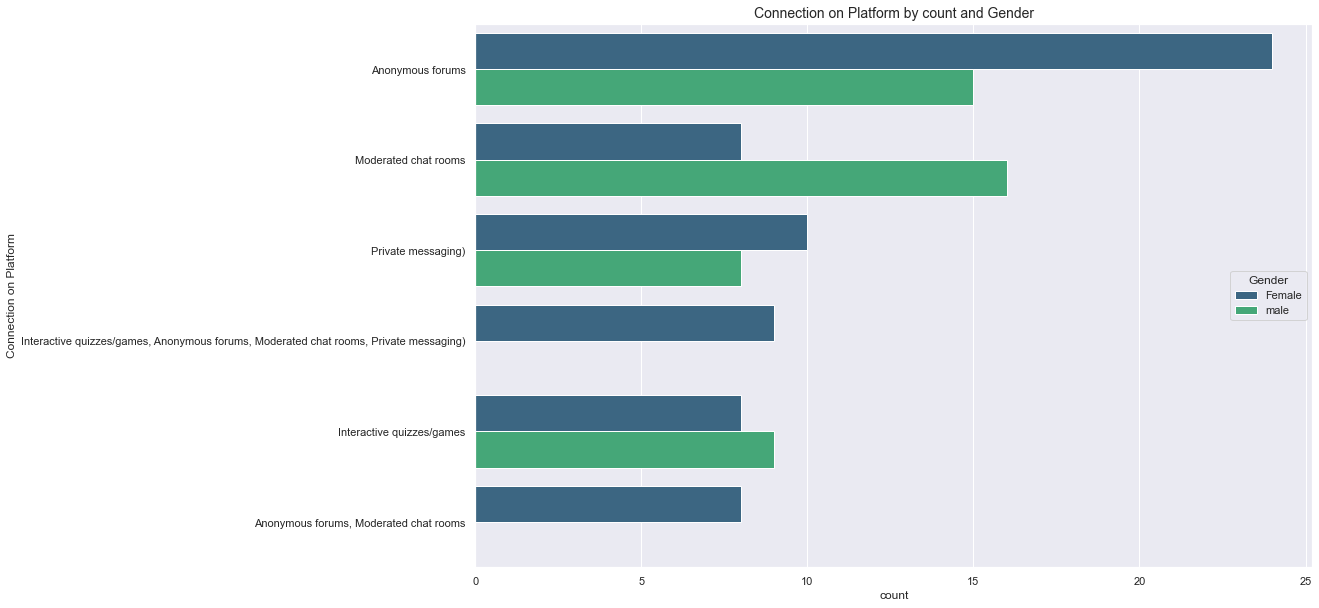

In [274]:
# Create bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x="count", y="Connection on Platform",data =INFORMATION ,hue="Gender", palette='viridis')

# Adding labels and title
plt.xlabel('count', fontsize=12)
plt.ylabel('Connection on Platform', fontsize=12)
plt.title('Connection on Platform by count and Gender', fontsize=14)

# Show plot
plt.show()


The data highlights gender-specific preferences in connection methods on the platform. Females tend to favor anonymous forums and interactive quizzes, while males show a preference for moderated chat rooms and private messaging. Understanding these preferences can inform platform design to cater to diverse user needs and enhance engagement and satisfaction.

To tailor BeeAware, UI/UX designers can create interfaces accommodating gender-specific connection preferences like forums or chat rooms. Frontend developers should integrate customization options, targeted notifications, and feedback mechanisms. Regular user research ensures ongoing optimization, promoting engagement and positive sexual health practices among diverse users.

Product designers play a crucial role in tailoring BeeAware by collaborating with UI/UX designers and frontend developers. They can lead the overall product strategy, ensuring alignment with user needs and platform objectives. Product designers facilitate user research, gather insights, and prioritize features to enhance user experience and promote engagement effectively.







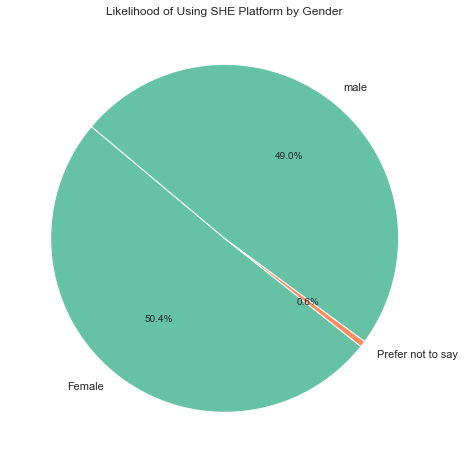

In [275]:
# Calculate the count of Likelihood of Using SHE Platform for each gender
likelihood_count = STI.groupby('Gender')['Likelihood of Using SHE Platform'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(likelihood_count, labels=likelihood_count.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Likelihood of Using SHE Platform by Gender')

# Show plot
plt.show()


In [276]:
STI["Gender"].value_counts()

Female               88
male                 84
Prefer not to say     2
Name: Gender, dtype: int64

Females have a higher likelihood of using the platform due to perceived need for sexual health information, comfort discussing sensitive topics online, cultural norms, and accessibility. Additionally, the larger number of females in the dataset could contribute to this trend. Further research is necessary to confirm these factors.


from this analysis other Tech enthusiasts can now think of what to do, to effectively develop the beeaware platform


In [397]:
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,10,2,2,4,6,4,70,2,1,0,0,66,2024,3,18,25,34
1,3/18/2024,10:05:30,0,2,2,3,2,3,0,3,1,2,4,65,2024,3,18,25,34
2,3/18/2024,12:14:04,8,0,4,5,2,5,4,5,2,0,12,76,2024,3,18,35,44
3,3/18/2024,12:14:50,22,4,4,5,3,4,51,5,2,2,10,114,2024,3,18,35,44
4,3/18/2024,14:02:00,18,3,4,4,10,5,6,4,1,2,12,138,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,10,3,4,4,6,5,37,5,1,0,1,42,2024,3,25,25,34
171,3/25/2024,22:16:12,26,3,3,4,0,4,25,4,1,0,3,67,2024,3,25,25,34
172,3/26/2024,14:55:10,14,4,4,5,6,5,28,3,1,2,4,62,2024,3,26,25,34
173,3/27/2024,12:14:54,29,2,2,1,0,1,7,5,1,0,6,65,2024,3,27,25,34


# Model prediction


If the models perform well, it suggests that the provided features are effective predictors of platform usage likelihood. This insight can guide BeeAware platform enhancements, such as tailored content delivery or feature prioritization. For tech enthusiasts, it underscores the importance of data-driven decision-making in product design, emphasizing user-centric approaches and continuous improvement based on predictive analytics.

In [398]:
STI_model = STI[['Confidence in STI Knowledge', 'SHE Adequacy', 'Comfort Level Using Anonymous SH Platform',"Sources of STI Information"]]
STI_model

,Confidence in STI Knowledge,SHE Adequacy,Comfort Level Using Anonymous SH Platform,Sources of STI Information
0,2,4,2,10
1,2,3,3,0
2,0,5,5,8
3,4,5,5,22
4,3,4,4,18
...,...,...,...,...
170,3,4,5,10
171,3,4,4,26
172,4,5,3,14
173,2,1,5,29


In [448]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
STI['Sources of STI Information'] = label_encoder.fit_transform(STI['Sources of STI Information'])
STI['Preferred Topics'] = label_encoder.fit_transform(STI['Preferred Topics'])
STI['Age range'] = label_encoder.fit_transform(STI['Age range'])
STI['Gender'] = label_encoder.fit_transform(STI['Gender'])
STI["Key Features in SHE Platform"]=label_encoder.fit_transform(STI["Key Features in SHE Platform"])
STI["Connection on Platform"]=label_encoder.fit_transform(STI["Connection on Platform"])
STI["Unaddressed SH Topics/Questions"]=label_encoder.fit_transform(STI["Unaddressed SH Topics/Questions"])
STI["Likelihood of Using SHE Platform"]=label_encoder.fit_transform(STI["Likelihood of Using SHE Platform"])
#print the encoded coumns
STI

,Timestamp,Time,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions,YEAR,MONTH,DAY,lower Age,Upper Age
0,3/18/2024,9:31:22,10,2,2,4,6,4,70,2,1,0,0,66,2024,3,18,25,34
1,3/18/2024,10:05:30,0,2,2,3,2,3,0,3,1,2,4,65,2024,3,18,25,34
2,3/18/2024,12:14:04,8,0,4,5,2,5,4,5,2,0,12,76,2024,3,18,35,44
3,3/18/2024,12:14:50,22,4,4,5,3,4,51,5,2,2,10,114,2024,3,18,35,44
4,3/18/2024,14:02:00,18,3,4,4,10,5,6,4,1,2,12,138,2024,3,18,25,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3/25/2024,21:50:44,10,3,4,4,6,5,37,5,1,0,1,42,2024,3,25,25,34
171,3/25/2024,22:16:12,26,3,3,4,0,4,25,4,1,0,3,67,2024,3,25,25,34
172,3/26/2024,14:55:10,14,4,4,5,6,5,28,3,1,2,4,62,2024,3,26,25,34
173,3/27/2024,12:14:54,29,2,2,1,0,1,7,5,1,0,6,65,2024,3,27,25,34


In [449]:
#Dropping columns that won't be needed while predicting
STI_new=STI[["Sources of STI Information", "Confidence in STI Knowledge","Likelihood of Using SHE Platform" ,"SHE Adequacy","Preferred Topics","Importance of Anonymous STI Info","Key Features in SHE Platform","Comfort Level Using Anonymous SH Platform","Age range","Gender","Connection on Platform","Unaddressed SH Topics/Questions"]]

In [450]:
STI_new

,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions
0,10,2,2,4,6,4,70,2,1,0,0,66
1,0,2,2,3,2,3,0,3,1,2,4,65
2,8,0,4,5,2,5,4,5,2,0,12,76
3,22,4,4,5,3,4,51,5,2,2,10,114
4,18,3,4,4,10,5,6,4,1,2,12,138
...,...,...,...,...,...,...,...,...,...,...,...,...
170,10,3,4,4,6,5,37,5,1,0,1,42
171,26,3,3,4,0,4,25,4,1,0,3,67
172,14,4,4,5,6,5,28,3,1,2,4,62
173,29,2,2,1,0,1,7,5,1,0,6,65


# FEATURE SELECTION WITH CORRELATION METHOD

In [451]:
#using the corr mtd to find thier relationship
STI_new_corr=STI_new.corr()
STI_new_corr

,Sources of STI Information,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions
Sources of STI Information,1.000000,-0.107363,-0.095250,-0.055850,-0.076933,0.006464,-0.017015,0.014730,0.007224,-0.062874,-0.021810,0.028333
Confidence in STI Knowledge,-0.107363,1.000000,0.281929,0.265993,0.185014,0.193805,-0.049867,0.288464,0.091788,0.059744,0.012025,0.029180
Likelihood of Using SHE Platform,-0.095250,0.281929,1.000000,0.419621,0.091982,0.400879,-0.078888,0.371349,0.122239,0.028289,0.090146,-0.011419
SHE Adequacy,-0.055850,0.265993,0.419621,1.000000,0.073377,0.335408,0.084793,0.270465,-0.032309,-0.019599,0.100236,-0.026777
Preferred Topics,-0.076933,0.185014,0.091982,0.073377,1.000000,0.138041,0.067643,-0.075195,0.011413,0.015300,0.009754,-0.002959
Importance of Anonymous STI Info,0.006464,0.193805,0.400879,0.335408,0.138041,1.000000,0.130504,0.438354,0.064256,-0.081905,0.062976,0.010257
Key Features in SHE Platform,-0.017015,-0.049867,-0.078888,0.084793,0.067643,0.130504,1.000000,0.034835,-0.045608,-0.049329,0.036419,0.034203
Comfort Level Using Anonymous SH Platform,0.014730,0.288464,0.371349,0.270465,-0.075195,0.438354,0.034835,1.000000,0.074327,-0.132325,-0.029474,-0.004814
Age range,0.007224,0.091788,0.122239,-0.032309,0.011413,0.064256,-0.045608,0.074327,1.000000,0.197561,0.150160,-0.029935
Gender,-0.062874,0.059744,0.028289,-0.019599,0.015300,-0.081905,-0.049329,-0.132325,0.197561,1.000000,0.141681,-0.003111


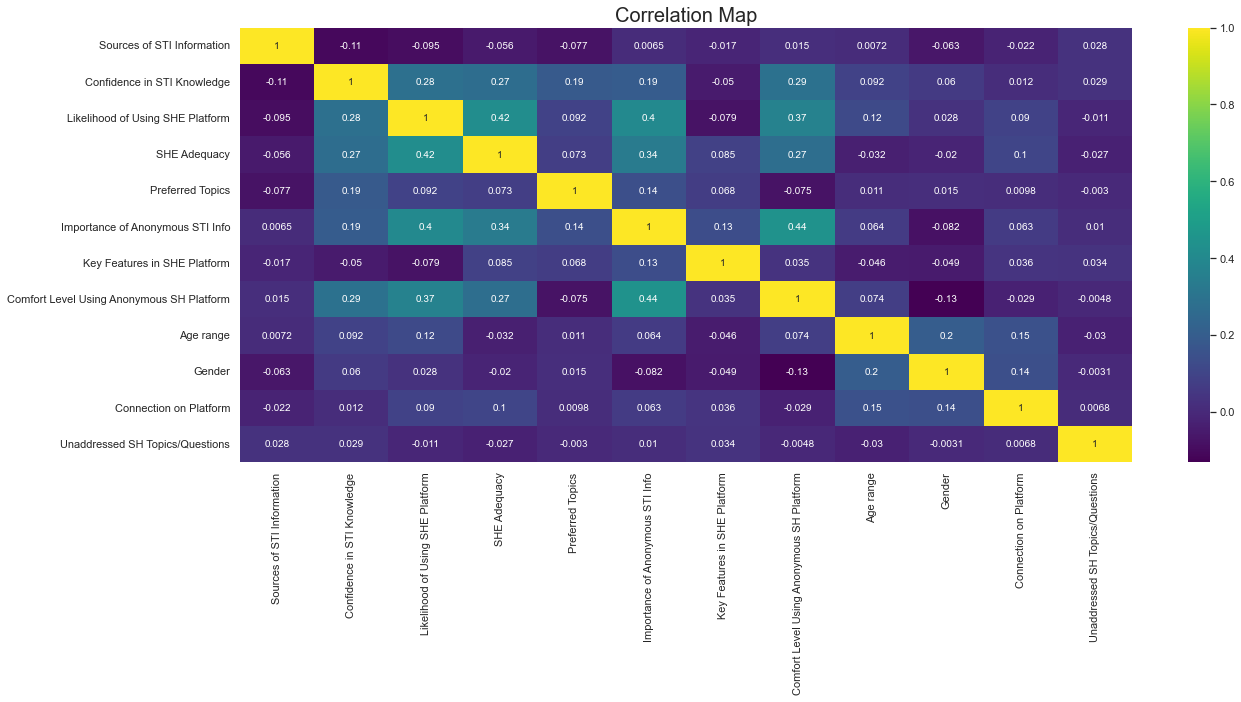

In [452]:
#visualizing correlation
plt.figure(figsize=(20,8))
sns.heatmap(data=STI_new_corr,annot = True,cmap= "viridis")
plt.title("Correlation Map", fontdict={"fontsize":20})
plt.show()

# chained prediction or hierarchical modeling/feature engineering

In [435]:
#spliting the input data into the dependent and the independent variable
X=STI_new.drop(columns=["Likelihood of Using SHE Platform"],axis=1)#independent variables
X

,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions
0,2,2,4,6,4,70,2,1,0,0,66
1,2,2,3,2,3,0,3,1,2,4,65
2,0,4,5,2,5,4,5,2,0,12,76
3,4,4,5,3,4,51,5,2,2,10,114
4,3,4,4,10,5,6,4,1,2,12,138
...,...,...,...,...,...,...,...,...,...,...,...
170,3,4,4,6,5,37,5,1,0,1,42
171,3,3,4,0,4,25,4,1,0,3,67
172,4,4,5,6,5,28,3,1,2,4,62
173,2,2,1,0,1,7,5,1,0,6,65


In [453]:
y=STI[["Likelihood of Using SHE Platform"]]#Dependent or target variable

In [454]:
y.head(50)

,Likelihood of Using SHE Platform
0,2
1,2
2,4
3,4
4,4
5,3
6,4
7,2
8,0
9,4


In [455]:
scaler=StandardScaler()
scaler

StandardScaler()

In [456]:
X_normalize =pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_normalize

,Confidence in STI Knowledge,Likelihood of Using SHE Platform,SHE Adequacy,Preferred Topics,Importance of Anonymous STI Info,Key Features in SHE Platform,Comfort Level Using Anonymous SH Platform,Age range,Gender,Connection on Platform,Unaddressed SH Topics/Questions
0,-0.305447,-0.805832,0.437837,0.288898,0.047250,1.273034,-1.714236,-0.044112,-0.982938,-1.179153,-0.197402
1,-0.305447,-0.805832,-0.381342,-0.555946,-0.774896,-1.663067,-0.864444,-0.044112,1.029194,-0.410716,-0.221989
2,-1.823954,0.863391,1.257017,-0.555946,0.869396,-1.495290,0.835141,1.052398,-0.982938,1.126157,0.048467
3,1.213060,0.863391,1.257017,-0.344735,0.047250,0.476092,0.835141,1.052398,1.029194,0.741939,0.982771
4,0.453807,0.863391,0.437837,1.133742,0.869396,-1.411402,-0.014652,-0.044112,1.029194,1.126157,1.572857
...,...,...,...,...,...,...,...,...,...,...,...
169,0.453807,0.863391,0.437837,0.288898,0.869396,-0.111128,0.835141,-0.044112,-0.982938,-0.987044,-0.787489
170,0.453807,0.028780,0.437837,-0.978369,0.047250,-0.614460,-0.014652,-0.044112,-0.982938,-0.602825,-0.172815
171,1.213060,0.863391,1.257017,0.288898,0.869396,-0.488627,-0.864444,-0.044112,1.029194,-0.410716,-0.295750
172,-0.305447,-0.805832,-2.019701,-0.978369,-2.419189,-1.369457,0.835141,-0.044112,-0.982938,-0.026498,-0.221989


In [457]:
#spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)

In [458]:
len(y_test)

35

In [459]:
len(X_train)

139

In [460]:
classifiers=[LogisticRegression(random_state=42),RandomForestClassifier(random_state=42), 
            SVC(random_state=42),XGBClassifier(random_state=42)]
model_names= ["Logistic Regression","Random Forest", "Support Vector Machine","XGradient boost"]

In [461]:
def train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test):
    reports = []
    for clf, model in zip(classifiers, model_names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred)
        reports.append(report)
    return model_names, reports

In [462]:
model_names, report = train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test)


In [463]:
for name, report in zip(model_names, report):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      0.33      0.40         3
           2       0.44      0.80      0.57         5
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        13

    accuracy                           0.83        35
   macro avg       0.79      0.72      0.73        35
weighted avg       0.88      0.83      0.84        35




Random Forest
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.00      0.00      0.00         3
           2       0.62      1.00      0.77         5
           3       1.00      1.00      1.00        11
           4       0.93      1.00      0.96        13

    accuracy                           0.86        35
   macro avg       0.61      0.67      0.63        35
weighted avg       0.79      0.86      0

In [467]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
print("\nFeature Importance:")
# Print feature importances and corresponding feature names
for feature_name, importance in zip(X.columns, feature_importances):
    print(feature_name, ":", importance)


Feature Importance:
Confidence in STI Knowledge : 0.05248947027566998
Likelihood of Using SHE Platform : 0.49366387761116287
SHE Adequacy : 0.06779117117882533
Preferred Topics : 0.0455842572731902
Importance of Anonymous STI Info : 0.07582291973941016
Key Features in SHE Platform : 0.05446204411335723
Comfort Level Using Anonymous SH Platform : 0.07182007448698378
Age range : 0.021903375324527505
Gender : 0.011414863726339347
Connection on Platform : 0.04089052690699372
Unaddressed SH Topics/Questions : 0.06415741936353984


# Trying out other columns 

In [481]:
# Independent variables
X = STI_new[['Confidence in STI Knowledge', 'SHE Adequacy', 'Importance of Anonymous STI Info', 'Comfort Level Using Anonymous SH Platform','Likelihood of Using SHE Platform']]

# Dependent variable
y = STI_new['Gender']


In [482]:
X

,Confidence in STI Knowledge,SHE Adequacy,Importance of Anonymous STI Info,Comfort Level Using Anonymous SH Platform,Likelihood of Using SHE Platform
0,2,4,4,2,2
1,2,3,3,3,2
2,0,5,5,5,4
3,4,5,4,5,4
4,3,4,5,4,4
...,...,...,...,...,...
170,3,4,5,5,4
171,3,4,4,4,3
172,4,5,5,3,4
173,2,1,1,5,2


In [483]:
y

0      0
1      2
2      0
3      2
4      2
      ..
170    0
171    0
172    2
173    0
174    2
Name: Gender, Length: 174, dtype: int64

In [484]:
scaler=StandardScaler()
scaler

StandardScaler()

In [485]:
X_normalize =pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_normalize

,Confidence in STI Knowledge,SHE Adequacy,Importance of Anonymous STI Info,Comfort Level Using Anonymous SH Platform,Likelihood of Using SHE Platform
0,-0.305447,0.437837,0.047250,-1.714236,-0.805832
1,-0.305447,-0.381342,-0.774896,-0.864444,-0.805832
2,-1.823954,1.257017,0.869396,0.835141,0.863391
3,1.213060,1.257017,0.047250,0.835141,0.863391
4,0.453807,0.437837,0.869396,-0.014652,0.863391
...,...,...,...,...,...
169,0.453807,0.437837,0.869396,0.835141,0.863391
170,0.453807,0.437837,0.047250,-0.014652,0.028780
171,1.213060,1.257017,0.869396,-0.864444,0.863391
172,-0.305447,-2.019701,-2.419189,0.835141,-0.805832


In [486]:
classifiers=[LogisticRegression(random_state=42),RandomForestClassifier(random_state=42), 
            SVC(random_state=42),XGBClassifier(random_state=42)]
model_names= ["Logistic Regression","Random Forest", "Support Vector Machine","XGradient boost"]

In [487]:
def train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test):
    reports = []
    for clf, model in zip(classifiers, model_names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred)
        reports.append(report)
    return model_names, reports

In [488]:
model_names, report = train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test)


In [489]:
for name, report in zip(model_names, report):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      0.33      0.40         3
           2       0.44      0.80      0.57         5
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        13

    accuracy                           0.83        35
   macro avg       0.79      0.72      0.73        35
weighted avg       0.88      0.83      0.84        35




Random Forest
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.00      0.00      0.00         3
           2       0.62      1.00      0.77         5
           3       1.00      1.00      1.00        11
           4       0.93      1.00      0.96        13

    accuracy                           0.86        35
   macro avg       0.61      0.67      0.63        35
weighted avg       0.79      0.86      0